In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import pickle


In [2]:
# Membaca dataset
data = pd.read_excel('balanced_dataset2.xlsx') 

# Menampilkan beberapa baris dataset
data

,jenis_kelamin,umur,pendidikan,pekerjaan,terlibat_kampanye,anggota_parpol,menggunakan_hak_pilih,label
0,Perempuan,35-39,S1,Guru/Dosen/PNS,Pernah,Ya,Ya,Aktif
1,Perempuan,30-34,SMA,Guru/Dosen/PNS,Pernah,Tidak,Ya,Aktif
2,Perempuan,35-39,SMA,Guru/Dosen/PNS,Pernah,Ya,Tidak,Aktif
3,Perempuan,50-55,SMP,Petani,Pernah,Ya,Ya,Aktif
4,Perempuan,30-34,S2,Wiraswasta,Pernah,Tidak,Tidak,Aktif
...,...,...,...,...,...,...,...,...
995,Laki-Laki,50-55,S3,Mahasiswa,Pernah,Ya,Tidak,Aktif
996,Perempuan,30-34,S3,Petani,Tidak Pernah,Tidak,Ya,Aktif
997,Perempuan,40-44,S1,Petani,Tidak Pernah,Tidak,Tidak,Pasif
998,Perempuan,18-24,S2,Guru/Dosen/PNS,Tidak Pernah,Tidak,Ya,Aktif


In [3]:
# Mapping fitur sesuai dengan deskripsi yang diberikan
mapping_jenis_kelamin = {'Laki-Laki': 1, 'Perempuan': 0.5}
mapping_umur = { '18-24': 0.4, '25-29': 0.6, '30-34': 0.7, '35-39': 0.8, '40-44': 1, '45-49': 0.9, '50-55': 0.5 }
mapping_pendidikan = {'SMP': 0.3, 'SMA': 0.4, 'S1': 0.8, 'S2': 0.9, 'S3': 1 }
mapping_pekerjaan = { 'Mahasiswa': 0.1, 'Petani': 0.2, 'Wiraswasta': 0.3, 'Guru/Dosen/PNS': 0.5 }
mapping_kampanye = {'Tidak Pernah': 0.5, 'Pernah': 1}
mapping_parpol = {'Tidak': 0.5, 'Ya': 1}
mapping_hak_pilih = {'Tidak': 0.5, 'Ya': 1}
mapping_label = {'Pasif': 0, 'Aktif': 1}

# Mengaplikasikan mapping ke dataset
data['jenis_kelamin'] = data['jenis_kelamin'].map(mapping_jenis_kelamin)
data['umur'] = data['umur'].map(mapping_umur)
data['pendidikan'] = data['pendidikan'].map(mapping_pendidikan)
data['pekerjaan'] = data['pekerjaan'].map(mapping_pekerjaan)
data['terlibat_kampanye'] = data['terlibat_kampanye'].map(mapping_kampanye)
data['anggota_parpol'] = data['anggota_parpol'].map(mapping_parpol)
data['menggunakan_hak_pilih'] = data['menggunakan_hak_pilih'].map(mapping_hak_pilih)
data['label'] = data['label'].map(mapping_label)

# Menampilkan beberapa baris dataset setelah dilakukan mapping
data

,jenis_kelamin,umur,pendidikan,pekerjaan,terlibat_kampanye,anggota_parpol,menggunakan_hak_pilih,label
0,0.5,0.8,0.8,0.5,1.0,1.0,1.0,1
1,0.5,0.7,0.4,0.5,1.0,0.5,1.0,1
2,0.5,0.8,0.4,0.5,1.0,1.0,0.5,1
3,0.5,0.5,0.3,0.2,1.0,1.0,1.0,1
4,0.5,0.7,0.9,0.3,1.0,0.5,0.5,1
...,...,...,...,...,...,...,...,...
995,1.0,0.5,1.0,0.1,1.0,1.0,0.5,1
996,0.5,0.7,1.0,0.2,0.5,0.5,1.0,1
997,0.5,1.0,0.8,0.2,0.5,0.5,0.5,0
998,0.5,0.4,0.9,0.5,0.5,0.5,1.0,1


In [4]:
# Memisahkan fitur dan label
X = data.drop('label', axis=1)
y = data['label']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Membangun model ANN
model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Mengkompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model dan menyimpan history
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3340 - loss: 0.7475 - val_accuracy: 0.5188 - val_loss: 0.7026
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5896 - loss: 0.6937 - val_accuracy: 0.7063 - val_loss: 0.6632
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7121 - loss: 0.6548 - val_accuracy: 0.7750 - val_loss: 0.6292
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7656 - loss: 0.6224 - val_accuracy: 0.7937 - val_loss: 0.5942
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7677 - loss: 0.5906 - val_accuracy: 0.8000 - val_loss: 0.5560
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7830 - loss: 0.5463 - val_accuracy: 0.8000 - val_loss: 0.5142
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7875 - loss: 0.5116 - val_accuracy: 0.8000 - val_loss: 0.4710
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8120 - loss: 0.4593 - val_accuracy: 0.8313 - 

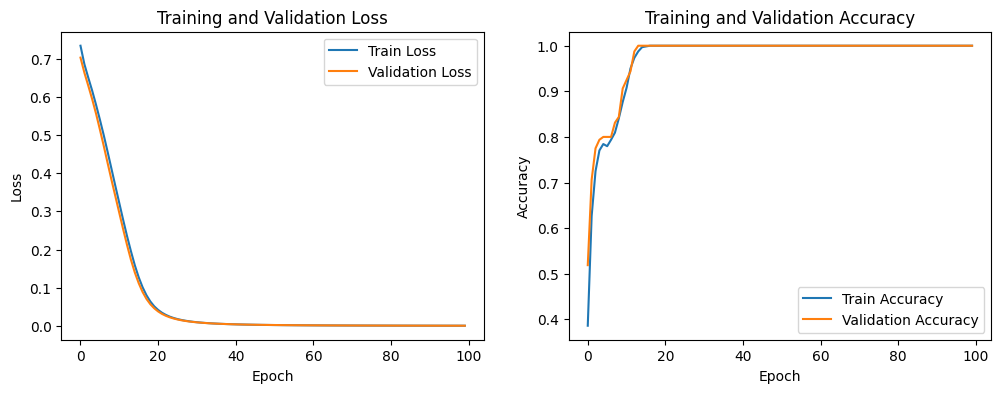

In [6]:
# Membuat plot untuk loss
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [7]:
# Mengevaluasi model pada data pengujian
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Menghitung metrik evaluasi
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(report)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Confusion Matrix:
[[ 58   0]
 [  0 142]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       142

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [8]:
# Menyimpan model dan scaler ke file pickle
with open('skenario5new_model.sav', 'wb') as file:
    pickle.dump(model, file)
with open('skenario5new_scaler.sav', 'wb') as file:
    pickle.dump(scaler, file)

In [9]:
# Memuat model dan scaler dari file pickle
with open('skenario5new_model.sav', 'rb') as file:
    loaded_model = pickle.load(file)
with open('skenario5new_scaler.sav', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Data input baru untuk pengujian
input_data = (1, 0.9, 0.3, 0.1, 1, 1, 1)
input_data_as_numpy_array = np.array(input_data).reshape(1, -1)

# Memastikan jumlah fitur sesuai dengan data pelatihan (21 fitur)
if input_data_as_numpy_array.shape[1] != X_train.shape[1]:
    input_data_as_numpy_array = np.pad(input_data_as_numpy_array, ((0, 0), (0, X_train.shape[1] - input_data_as_numpy_array.shape[1])), 'constant')

# Preprocessing data baru
std_data = loaded_scaler.transform(input_data_as_numpy_array)
print("Data setelah preprocessing:", std_data)

# Melakukan prediksi
y_pred = loaded_model.predict(std_data)
print("Hasil prediksi:", y_pred)

# Menampilkan hasil prediksi
if y_pred[0] <= 0.5:
    print('Pola Partisipasi Pasif')
else:
    print('Pola Partisipasi Aktif')


# Debug: Menampilkan data input
print("Input data:", input_data)

# Mengubah data input menjadi numpy array dan reshape
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Debug: Menampilkan data setelah reshape
print("Data setelah reshape:", input_data_reshape)

# Memastikan jumlah fitur sesuai dengan data pelatihan (21 fitur)
if input_data_reshape.shape[1] != X_train.shape[1]:
    input_data_reshape = np.pad(input_data_reshape, ((0, 0), (0, X_train.shape[1] - input_data_reshape.shape[1])), 'constant')

# Debug: Menampilkan data setelah padding
print("Data setelah padding:", input_data_reshape)

# Preprocessing data baru
std_data = loaded_scaler.transform(input_data_reshape)
print("Data setelah preprocessing:", std_data)

# Melakukan prediksi
y_pred = loaded_model.predict(std_data)
print("Hasil prediksi:", y_pred)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Data setelah preprocessing: [[ 1.02788874  0.98383808 -1.33395436 -1.15430566  1.02532046  0.98265048
   0.94169658]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Hasil prediksi: [[0.9999974]]
Pola Partisipasi Aktif
Input data: (1, 0.9, 0.3, 0.1, 1, 1, 1)
Data setelah reshape: [[1.  0.9 0.3 0.1 1.  1.  1. ]]
Data setelah padding: [[1.  0.9 0.3 0.1 1.  1.  1. ]]
Data setelah preprocessing: [[ 1.02788874  0.98383808 -1.33395436 -1.15430566  1.02532046  0.98265048
   0.94169658]]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Hasil prediksi: [[0.9999974]]
